#### Importing Libraries

In [1]:
import sqlalchemy
import numpy as np
import pandas as pd

import plotly
import plotly.offline as py
import plotly.graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import cufflinks as cf

%matplotlib inline
cf.go_offline()
py.init_notebook_mode(connected=True)


#### Database Access

In [2]:
database_username = 'root'
database_password = '#dV24DF&c!Bf21#@'
database_ip       = '127.0.0.1'
database_name     = 'gamersclub'


engine = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

#### Two-dimensional, size-mutable, potentially heterogeneous tabular data

In [3]:
df = pd.read_sql_table('matchmaking_stats_summary', engine, columns=['player_id','matches_played','total_wins','total_loss','mm_points','assist','death','hs','kills','created_at'])
df.head()

,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,created_at
0,354985,1,1,0,3,5,13,6,13,2020-02-01 00:47:32
1,152268,1,0,1,-1,3,20,2,15,2020-02-01 00:54:01
2,679247,1,0,1,-1,5,23,4,7,2020-02-01 01:00:31
3,604607,1,0,1,-1,3,21,8,11,2020-02-01 01:03:02
4,325203,1,1,0,3,2,13,11,21,2020-02-01 01:04:02


In [4]:
df['created_at_day'] = df.created_at.dt.to_period('D').astype(str)

#### Categorizing Data

In [5]:
# categorizar os dados por mm_points criando uma outra coluna no dataframe
# apply()
def categoriza(size_point):
    if size_point >= 30:
        return 'god';
    elif size_point >= 20 and size_point < 31:
        return 'pro';
    elif size_point >= 10 and size_point < 21:
        return 'hack';
    elif size_point <= 9:
        return 'noob';
    
# passar os dados para a função usando o método apply()
df['level'] = df['mm_points'].apply(categoriza)

In [6]:
df.head()

,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,created_at,created_at_day,level
0,354985,1,1,0,3,5,13,6,13,2020-02-01 00:47:32,2020-02-01,noob
1,152268,1,0,1,-1,3,20,2,15,2020-02-01 00:54:01,2020-02-01,noob
2,679247,1,0,1,-1,5,23,4,7,2020-02-01 01:00:31,2020-02-01,noob
3,604607,1,0,1,-1,3,21,8,11,2020-02-01 01:03:02,2020-02-01,noob
4,325203,1,1,0,3,2,13,11,21,2020-02-01 01:04:02,2020-02-01,noob


In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056
player_id,354985,152268,679247,604607,325203,95479,35792,679130,1129344,850067,...,480492,805310,802646,1181434,168613,500543,576674,640357,758201,39554
matches_played,1,1,1,1,1,1,1,1,1,1,...,1,6,1,1,1,2,1,8,1,10
total_wins,1,0,0,0,1,0,1,0,1,0,...,0,3,1,0,0,1,1,2,1,3
total_loss,0,1,1,1,0,1,0,1,0,1,...,1,3,0,1,1,1,0,6,0,7
mm_points,3,-1,-1,-1,3,-1,3,-1,3,-1,...,-1,5,3,-1,-1,2,3,0,3,2
assist,5,3,5,3,2,6,4,2,5,7,...,3,27,0,4,2,7,3,37,3,41
death,13,20,23,21,13,22,18,21,19,22,...,25,108,9,16,17,35,12,169,13,219
hs,6,2,4,8,11,4,12,5,11,9,...,8,47,7,4,7,18,1,25,15,68
kills,13,15,7,11,21,14,17,15,13,14,...,11,71,14,7,10,23,11,77,17,116
created_at,2020-02-01 00:47:32,2020-02-01 00:54:01,2020-02-01 01:00:31,2020-02-01 01:03:02,2020-02-01 01:04:02,2020-02-01 01:08:32,2020-02-01 01:09:32,2020-02-01 01:09:32,2020-02-01 01:11:32,2020-02-01 01:13:31,...,2020-02-06 23:46:01,2020-02-06 23:47:32,2020-02-06 23:50:02,2020-02-06 23:50:02,2020-02-06 23:51:02,2020-02-06 23:51:02,2020-02-06 23:56:31,2020-02-06 23:56:31,2020-02-06 23:56:31,2020-02-06 23:56:31


#### Return a tuple representing the dimensionality of the DataFrame

In [7]:
df.shape

(2057, 12)

#### Print a concise summary of a DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   player_id       2057 non-null   int64         
 1   matches_played  2057 non-null   int64         
 2   total_wins      2057 non-null   int64         
 3   total_loss      2057 non-null   int64         
 4   mm_points       2057 non-null   int64         
 5   assist          2057 non-null   int64         
 6   death           2057 non-null   int64         
 7   hs              2057 non-null   int64         
 8   kills           2057 non-null   int64         
 9   created_at      2057 non-null   datetime64[ns]
 10  created_at_day  2057 non-null   object        
 11  level           2057 non-null   object        
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 193.0+ KB


#### Show which entries in a DataFrame are NA

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

player_id         0
matches_played    0
total_wins        0
total_loss        0
mm_points         0
assist            0
death             0
hs                0
kills             0
created_at        0
created_at_day    0
level             0
dtype: int64

## Challenge

#### 1. How many unique users did not play after  2020-02-03?

In [12]:
filter_datetime = (df['created_at'] >= '2020-02-03 23:59:59') 
database = df[filter_datetime]
database['player_id'].nunique()

995

#### 2. How many unique users played in February after the day 06/02/2020?

In [13]:
filter_datetime = (df['created_at'] > '2020-02-06 23:59:59') 
df_filtrado = df[filter_datetime]
df_filtrado['player_id'].nunique()

0

#### 3. Which day most players stopped playing in February?

In [14]:
df.groupby('created_at_day').player_id.count()[2:3]

created_at_day
2020-02-03    314
Name: player_id, dtype: int64

#### Selecting the coluanas needed to plot the graph

In [15]:
df_graph = df[['player_id','matches_played','total_wins','total_loss','mm_points','assist','death','hs','kills','level']]
df_graph[:5]

,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,level
0,354985,1,1,0,3,5,13,6,13,noob
1,152268,1,0,1,-1,3,20,2,15,noob
2,679247,1,0,1,-1,5,23,4,7,noob
3,604607,1,0,1,-1,3,21,8,11,noob
4,325203,1,1,0,3,2,13,11,21,noob


#### Grouping the entire base by 'level' and maximum achieved in decreasing order

In [17]:
df_graph = df_graph.groupby('level').max().sort_values('mm_points',ascending=False)
x=df_graph.reset_index()
x

,level,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills
0,god,1031951,49,22,27,45,222,953,242,632
1,pro,1231469,34,15,19,29,153,680,212,429
2,hack,1275270,17,9,9,19,94,363,137,244
3,noob,1280236,21,7,15,9,90,473,152,259


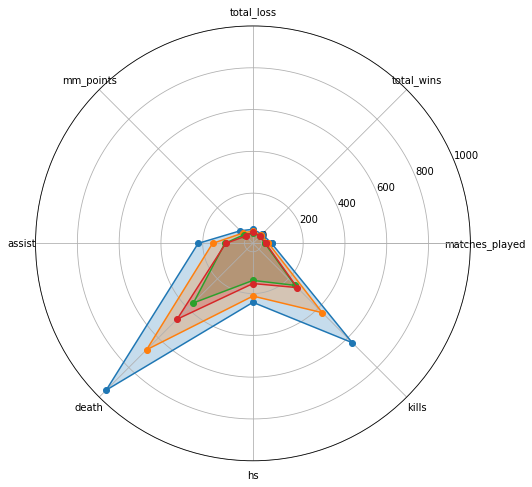

In [18]:
# Names for Stat Columns
cols = ['matches_played', 'total_wins', 'total_loss', 'mm_points', 'assist','death','hs','kills']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

legends = []
for i in range(0,4):
    data = x.loc[i, cols].values
    angles=np.linspace(0, 2*np.pi, len(cols), endpoint=False)
    stats=np.concatenate((data,[data[0]]))
    angles=np.concatenate((angles,[angles[0]]))
  
    ax.plot(angles, stats, "o-")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, cols)
    
plt.show()
#plt.savefig('gráfico por "level"')

#### Selecting the top 10 in descending order of 'mm_points'

In [23]:
db=df.nlargest(10,'mm_points')
db_nlargest=db.reset_index()
db_nlargest

,index,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,created_at,created_at_day,level
0,1598,221818,23,17,6,45,113,395,242,297,2020-02-05 19:46:02,2020-02-05,god
1,1494,396352,49,22,27,39,222,953,240,632,2020-02-05 15:42:01,2020-02-05,god
2,1685,1031951,17,12,5,31,73,310,132,228,2020-02-05 22:44:31,2020-02-05,god
3,1759,456980,18,12,6,30,94,328,163,245,2020-02-06 01:37:02,2020-02-06,god
4,1835,734457,19,12,7,29,93,377,211,305,2020-02-06 16:00:32,2020-02-06,pro
5,1997,112578,23,13,10,29,82,432,163,293,2020-02-06 22:09:31,2020-02-06,pro
6,1734,328364,12,10,2,28,56,206,67,150,2020-02-06 00:23:01,2020-02-06,pro
7,1008,1030170,20,12,8,27,94,338,120,228,2020-02-03 22:35:39,2020-02-03,pro
8,638,272428,14,10,4,26,67,255,129,201,2020-02-02 20:04:02,2020-02-02,pro
9,835,76423,14,10,4,26,63,266,138,196,2020-02-03 15:14:01,2020-02-03,pro


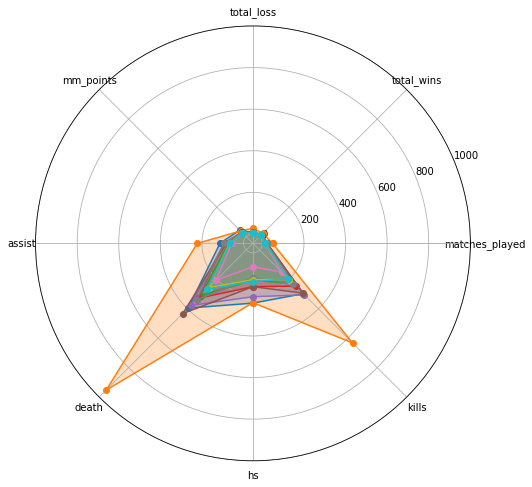

In [24]:
# Names for Stat Columns
cols = [ 'matches_played', 'total_wins', 'total_loss', 'mm_points', 'assist','death','hs','kills']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

legends = []
for i in range(0,10):
    data = db_nlargest.loc[i, cols].values
    angles=np.linspace(0, 2*np.pi, len(cols), endpoint=False)
    stats=np.concatenate((data,[data[0]]))
    angles=np.concatenate((angles,[angles[0]]))
  
    ax.plot(angles, stats, "o-")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, cols)

plt.show()

#### Selecting the last 10 placed in descending order of 'mm_points'

In [25]:
db=df.nsmallest(10, 'mm_points')
db_nsmallest=db.reset_index()
db_nsmallest

,index,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,created_at,created_at_day,level
0,1588,1235537,7,0,7,-8,23,136,35,76,2020-02-05 19:22:32,2020-02-05,noob
1,1219,599845,8,1,7,-6,21,112,28,65,2020-02-04 18:50:02,2020-02-04,noob
2,1676,809608,13,2,11,-6,43,239,72,132,2020-02-05 22:33:31,2020-02-05,noob
3,390,1173514,4,0,4,-5,9,58,11,32,2020-02-02 03:32:02,2020-02-02,noob
4,806,740122,4,0,4,-5,14,88,36,50,2020-02-03 11:37:01,2020-02-03,noob
5,1020,1163265,5,0,5,-5,14,105,50,67,2020-02-03 23:02:31,2020-02-03,noob
6,1304,1093742,8,1,7,-5,35,170,68,107,2020-02-04 21:40:32,2020-02-04,noob
7,1385,48418,4,0,4,-5,13,87,26,37,2020-02-05 00:08:31,2020-02-05,noob
8,275,1271999,3,0,3,-4,8,59,4,18,2020-02-01 22:25:03,2020-02-01,noob
9,353,745664,2,0,2,-4,1,17,5,11,2020-02-02 01:19:01,2020-02-02,noob


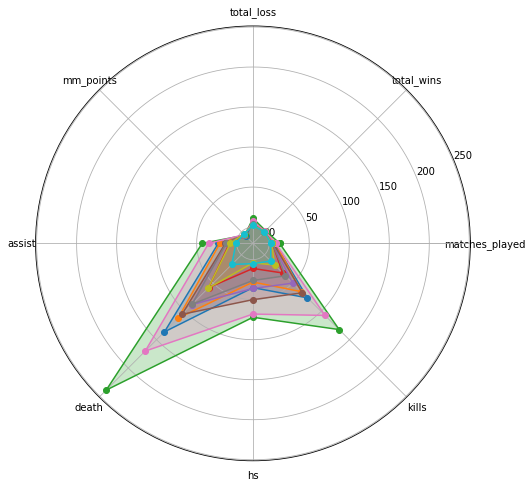

In [26]:
# Names for Stat Columns
cols = [ 'matches_played', 'total_wins', 'total_loss', 'mm_points', 'assist','death','hs','kills']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

legends = []
for i in range(0,10):
    data = db_nsmallest.loc[i, cols].values
    angles=np.linspace(0, 2*np.pi, len(cols), endpoint=False)
    stats=np.concatenate((data,[data[0]]))
    angles=np.concatenate((angles,[angles[0]]))
  
    ax.plot(angles, stats, "o-")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, cols)
    
plt.show()

#### Describe()

In [27]:
x = df[['matches_played','total_wins','total_loss','mm_points','assist','death','hs','kills','level']]
x.head()

,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,level
0,1,1,0,3,5,13,6,13,noob
1,1,0,1,-1,3,20,2,15,noob
2,1,0,1,-1,5,23,4,7,noob
3,1,0,1,-1,3,21,8,11,noob
4,1,1,0,3,2,13,11,21,noob


#### Geral

In [28]:
round(x.describe(),2)

,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills
count,2057.00,2057.00,2057.00,2057.00,2057.00,2057.00,2057.00,2057.00
mean,2.56,1.27,1.28,2.49,10.27,46.07,18.46,31.80
std,3.18,1.84,1.77,4.73,14.13,61.31,24.95,42.75
min,1.00,0.00,0.00,-8.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,-1.00,3.00,17.00,6.00,11.00
50%,1.00,1.00,1.00,2.00,6.00,23.00,10.00,17.00
75%,3.00,2.00,1.00,3.00,12.00,50.00,21.00,34.00
max,49.00,22.00,27.00,45.00,222.00,953.00,242.00,632.00


#### mm_points

In [32]:
round(df.groupby('level').mm_points.describe(),2).sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,36.25,7.09,30.0,30.75,35.0,40.5,45.0
pro,28.0,23.79,2.57,20.0,22.00,23.0,26.0,29.0
hack,98.0,12.77,2.64,10.0,11.00,12.0,14.0,19.0
noob,1927.0,1.58,2.86,-8.0,-1.00,2.0,3.0,9.0


#### God

In [33]:
god = df.query('level == "god"').sort_values(by='mm_points', ascending = False)
god = god.reset_index()
god

,index,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,created_at,created_at_day,level
0,1598,221818,23,17,6,45,113,395,242,297,2020-02-05 19:46:02,2020-02-05,god
1,1494,396352,49,22,27,39,222,953,240,632,2020-02-05 15:42:01,2020-02-05,god
2,1685,1031951,17,12,5,31,73,310,132,228,2020-02-05 22:44:31,2020-02-05,god
3,1759,456980,18,12,6,30,94,328,163,245,2020-02-06 01:37:02,2020-02-06,god


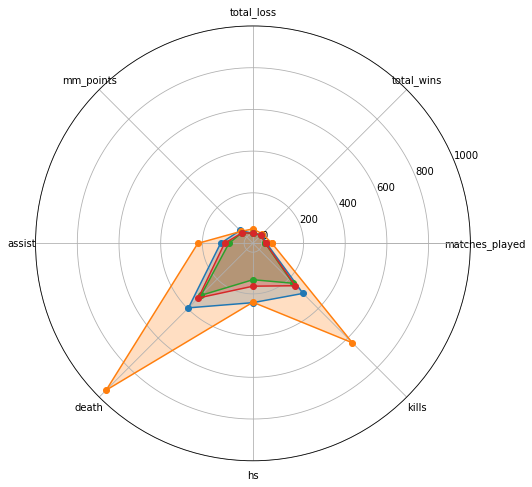

In [36]:
# Names for Stat Columns
cols = [ 'matches_played', 'total_wins', 'total_loss', 'mm_points', 'assist','death','hs','kills']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

legends = []
for i in range(0,4):
    data = god.loc[i, cols].values
    angles=np.linspace(0, 2*np.pi, len(cols), endpoint=False)
    stats=np.concatenate((data,[data[0]]))
    angles=np.concatenate((angles,[angles[0]]))
  
    ax.plot(angles, stats, "o-")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, cols)
   
plt.show()

#### Matches_played

In [41]:
round(df.groupby('level').matches_played.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,26.75,15.06,17.0,17.75,20.5,29.50,49.0
pro,28.0,15.61,6.59,7.0,10.75,14.0,19.25,34.0
noob,1927.0,2.05,1.99,1.0,1.00,1.0,2.00,21.0
hack,98.0,7.77,3.33,4.0,5.00,6.5,9.00,17.0


#### Total_wins

In [42]:
round(df.groupby('level').total_wins.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,15.75,4.79,12.0,12.00,14.5,18.25,22.0
pro,28.0,9.89,1.99,7.0,8.75,10.0,10.50,15.0
hack,98.0,5.16,1.34,4.0,4.00,5.0,6.00,9.0
noob,1927.0,0.92,1.00,0.0,0.00,1.0,1.00,7.0


#### Total_loss

In [43]:
round(df.groupby('level').total_loss.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,11.00,10.68,5.0,5.75,6.0,11.25,27.0
pro,28.0,5.71,4.74,0.0,2.00,4.5,7.25,19.0
noob,1927.0,1.13,1.42,0.0,0.00,1.0,1.00,15.0
hack,98.0,2.59,2.16,0.0,1.00,2.0,4.00,9.0


#### Assistance

In [44]:
round(df.groupby('level').assist.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,125.50,66.38,73.0,88.75,103.5,140.25,222.0
pro,28.0,66.86,26.63,32.0,47.00,64.0,81.25,153.0
hack,98.0,34.79,16.75,9.0,23.00,30.5,42.00,94.0
noob,1927.0,7.96,8.50,0.0,3.00,5.0,10.00,90.0


#### Death

In [45]:
round(df.groupby('level').death.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,496.50,306.52,310.0,323.5,361.5,534.50,953.0
pro,28.0,285.32,132.90,129.0,183.0,251.5,352.25,680.0
noob,1927.0,36.85,40.15,0.0,17.0,22.0,42.00,473.0
hack,98.0,140.76,64.89,55.0,90.0,123.5,178.00,363.0


#### Head shot

In [46]:
round(df.groupby('level').hs.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,194.25,55.45,132.0,155.25,201.5,240.50,242.0
pro,28.0,123.29,42.32,62.0,84.00,125.0,146.75,212.0
noob,1927.0,14.30,15.69,0.0,5.00,9.0,17.00,152.0
hack,98.0,63.16,30.02,18.0,42.00,55.5,82.00,137.0


#### Death

In [48]:
df.groupby('level').death.sum().reset_index()

,level,death
0,god,1986
1,hack,13794
2,noob,71006
3,pro,7989


#### Kills

In [47]:
round(df.groupby('level').kills.describe(),2).sort_values(by='max', ascending = False)

,count,mean,std,min,25%,50%,75%,max
level,,,,,,,,
god,4.0,350.50,189.95,228.0,240.75,271.0,380.75,632.0
pro,28.0,212.79,73.44,96.0,153.75,202.0,255.75,429.0
noob,1927.0,24.60,25.79,0.0,10.00,16.0,29.00,259.0
hack,98.0,108.56,47.82,44.0,73.50,90.0,131.00,244.0


#### Quais foram os jogadores que cometeram mais kills  

In [49]:
df.query('kills == 632 or kills == 429 or kills == 259 or kills == 244').sort_values(by='kills', ascending=False)

,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,created_at,created_at_day,level
1494,396352,49,22,27,39,222,953,240,632,2020-02-05 15:42:01,2020-02-05,god
1755,241767,34,15,19,26,153,680,212,429,2020-02-06 01:07:31,2020-02-06,pro
1899,802786,18,7,11,9,90,364,152,259,2020-02-06 18:28:02,2020-02-06,noob
1128,74400,16,7,8,13,77,315,102,244,2020-02-04 13:29:02,2020-02-04,hack


#### Graphic

In [50]:
corrs = df[['matches_played','total_wins','total_loss','mm_points','assist','death','hs','kills']].corr()
round(corrs, 2)

,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills
matches_played,1.00,0.89,0.88,0.69,0.95,0.98,0.91,0.97
total_wins,0.89,1.00,0.56,0.94,0.88,0.86,0.88,0.91
total_loss,0.88,0.56,1.00,0.26,0.79,0.89,0.73,0.81
mm_points,0.69,0.94,0.26,1.00,0.72,0.65,0.74,0.74
assist,0.95,0.88,0.79,0.72,1.00,0.95,0.90,0.96
death,0.98,0.86,0.89,0.65,0.95,1.00,0.91,0.97
hs,0.91,0.88,0.73,0.74,0.90,0.91,1.00,0.95
kills,0.97,0.91,0.81,0.74,0.96,0.97,0.95,1.00


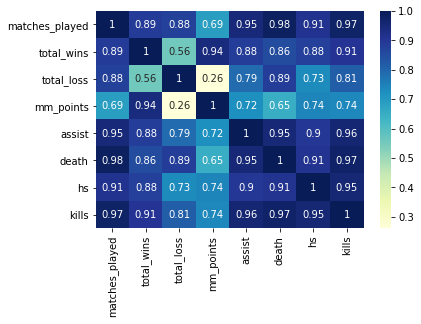

In [51]:
sns.heatmap(corrs, annot=True, cmap="YlGnBu")

In [52]:
# Criando gráfico

trace = go.Scatter(x = df['total_wins'],
                   y = df['total_loss'],
                   mode = 'markers')

# Armazenando gráfico em uma lista

data = [trace]

# Criando Layout

layout = go.Layout(title='Valores aleatórios',
                   yaxis={'title':'total_wins'},
                   xaxis={'title': 'total_loss'})

# Criando figura que será exibida

fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico

py.iplot(fig)

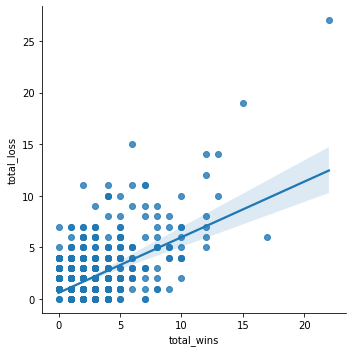

In [53]:
sns.lmplot('total_wins', 'total_loss', palette="Set1",data = df)

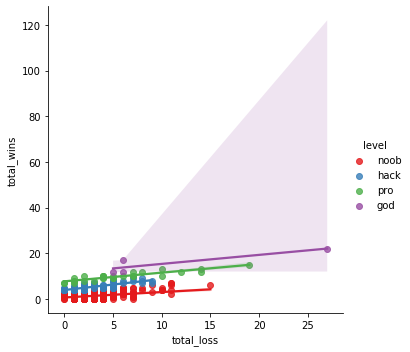

In [54]:
sns.lmplot('total_loss', 'total_wins', hue ='level', palette="Set1",data = df)

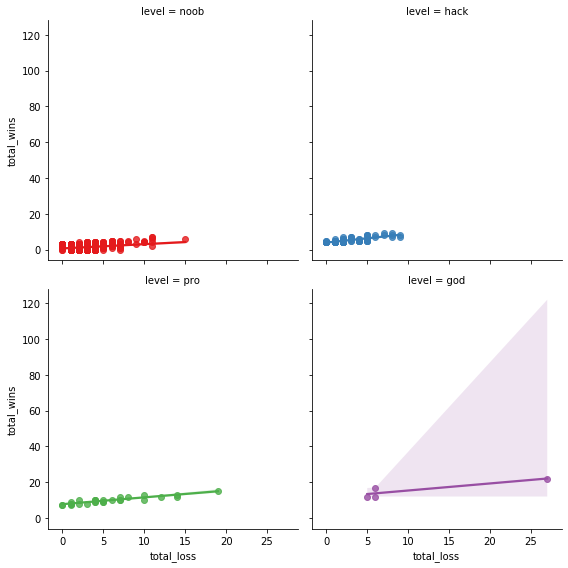

In [55]:
sns.lmplot(x="total_loss", y="total_wins", col="level", hue="level",palette="Set1",
               data=df, col_wrap=2, height=4)

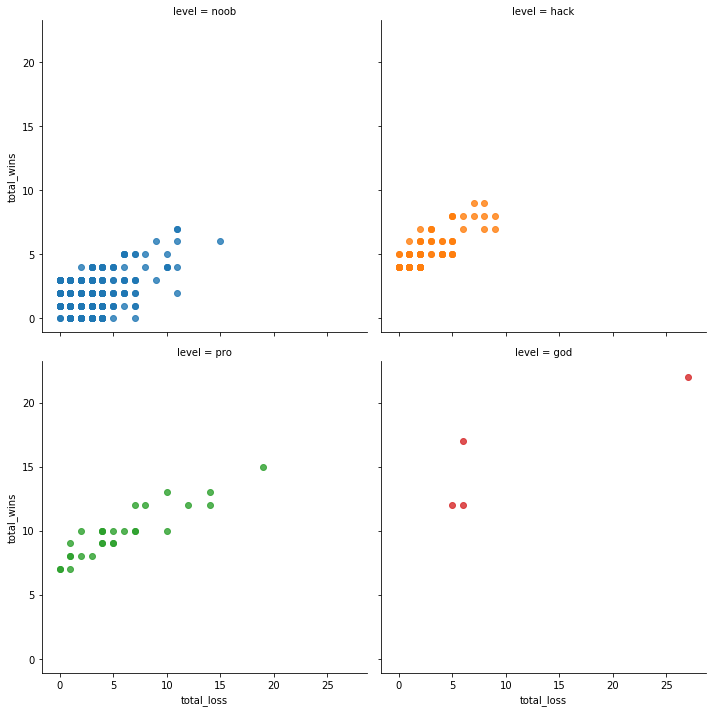

In [56]:
sns.lmplot("total_loss", "total_wins", data=df, hue="level", fit_reg=False, col='level', col_wrap=2)

,total_wins,total_loss,mm_points,level
player_id,,,,
221818,17,6,45,god
396352,22,27,39,god
1031951,12,5,31,god
456980,12,6,30,god


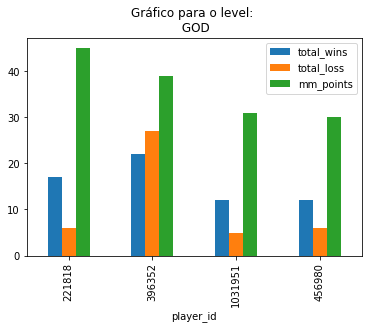

In [57]:
data = round(df[['total_wins','total_loss','mm_points', 'level', 'player_id']],2)

nivel_god = data[data['level'] == 'god'].set_index(['player_id'])
god = nivel_god.sort_values(by = 'mm_points', ascending = False)
god
#distribuição dos valores da coluna
god.plot.bar(title='Gráfico para o level: \n GOD')
god

In [58]:
contagem_de_player = df.groupby(by='created_at_day').player_id.count()
contagem_de_player

created_at_day
2020-02-01    328
2020-02-02    411
2020-02-03    314
2020-02-04    331
2020-02-05    341
2020-02-06    332
Name: player_id, dtype: int64

In [59]:
contagem_de_pontos=df.groupby(by='created_at_day').matches_played.sum()
contagem_de_pontos

created_at_day
2020-02-01     470
2020-02-02     837
2020-02-03     774
2020-02-04     931
2020-02-05    1086
2020-02-06    1158
Name: matches_played, dtype: int64

In [60]:
contagem_de_kills=df.groupby(by='created_at_day').kills.sum()
contagem_de_kills

created_at_day
2020-02-01     5502
2020-02-02    10436
2020-02-03     9601
2020-02-04    11687
2020-02-05    13603
2020-02-06    14579
Name: kills, dtype: int64

In [61]:
# Create traces
trace0 = go.Scatter(
    x = contagem_de_player.index,
    y = contagem_de_player.values,
    mode = 'lines+markers',
    name = 'player_id'
)
trace1 = go.Scatter(
    x = contagem_de_pontos.index,
    y = contagem_de_pontos.values,
    mode = 'lines+markers',
    name = 'matches_played'
)
trace2 = go.Scatter(
    x = contagem_de_kills.index,
    y = contagem_de_kills.values,
    mode = 'lines+markers',
    name = 'kills'
)

data = [trace0, trace1, trace2]
py.iplot(data, filename='scatter-mode')